# **Data-Driven Strategies to Minimize Telco Customer Churn**

### **Problem Statement:**

Customer churn is a critical issue for telecommunication companies, directly impacting revenue and profitability. Identifying customers at risk of leaving is essential to implement retention strategies, reduce churn rates, and improve customer satisfaction.

This project focuses on analyzing customer data from a telecommunications provider to predict churn behavior. By leveraging customer demographics, service usage patterns, and contract details, the goal is to develop a machine learning model that enables proactive interventions, optimizes customer retention efforts, and minimizes revenue loss due to churn.

> **Target Variable (Churn):**
> - **Yes**: Indicates a customer who has churned (left the service).
> - **No**: Indicates a customer who has not churned (remained with the service).

---

### **Goals:**

- **Develop a predictive model** to accurately identify customers likely to churn, enabling targeted retention strategies.
- **Understand key churn factors** to address underlying issues and improve service offerings.
- **Enhance customer segmentation** to identify high-risk groups for better resource allocation.
- **Improve overall customer satisfaction** by proactively addressing dissatisfaction and retaining valuable customers.

---


### **Analytic Approach:**

1. **Data Exploration:**  
   - Perform **exploratory data analysis (EDA)** to identify trends, patterns, and correlations between customer attributes and churn behavior.

2. **Data Preparation:**  
   - Handle missing values, encode categorical variables, scale numerical data, and address class imbalance to create a clean dataset for modeling.

3. **Model Development:**  
   - **Train classification algorithms** such as logistic regression, random forests, and gradient boosting to predict customer churn.

4. **Model Evaluation:**  
   - Evaluate performance using metrics like **`precision`**, **`recall`**, **`F1 Score`**, and **`ROC AUC`** to ensure the model balances accuracy and business impact.

5. **Insights and Recommendations:**  
   - **Interpret model outputs** to identify key factors driving churn and provide actionable recommendations for improving customer retention.

---

### **Understanding False Positives and False Negatives in Telco Churn Prediction**

**False Positive (FP):**  
- The model predicts a customer will churn, but they actually remain loyal.  
- **Business Impact:** Resources are wasted targeting customers who are not at risk, increasing costs without improving retention.

**False Negative (FN):**  
- The model predicts a customer will remain, but they actually churn.  
- **Business Impact:** A missed opportunity to intervene and retain a customer, resulting in revenue loss and potential damage to brand reputation.

---

### **Deciding Which is More Critical: FP or FN?**

- **False Negatives** are **more critical** in the context of customer churn, as failing to identify at-risk customers can lead to significant revenue loss and missed opportunities to address dissatisfaction.
- **False Positives** are less harmful but still important to minimize, as they can lead to inefficient use of retention resources.

> **Conclusion:** Minimizing **false negatives** should be the priority to ensure high-risk customers are accurately identified and retention efforts are focused effectively.

---

### **Choosing Evaluation Metrics for Churn Prediction**

**Recall** is the most critical metric, ensuring that the model captures as many high-risk customers as possible to enable effective retention strategies. However, balancing **recall** with **precision** using the **F1 Score** is essential to avoid excessive costs from unnecessary interventions.

**ROC AUC** provides an overall measure of the model's discriminatory power and is useful for comparing different algorithms during model selection.

**Conclusion:**  
- **Prioritize recall** to reduce the risk of missing at-risk customers.  
- **Use the F1 Score** to balance recall and precision.  
- **Consider ROC AUC** as a supplementary metric for overall model performance.

---

## **Data Understanding**

### **Attribute Information**

This dataset contains **4930 records** with **11 attributes**, describing customer characteristics and behaviors to predict whether a customer will churn from the telco service.

| Attribute           | Data Type         | Description |
|---------------------|-------------------|-------------|
| Dependents          | Binary            | Indicates whether the customer has dependents (Yes/No). |
| Tenure              | Integer           | Number of months the customer has stayed with the company. |
| OnlineSecurity      | Binary            | Indicates whether the customer has online security (Yes/No). |
| OnlineBackup        | Binary            | Indicates whether the customer has online backup (Yes/No). |
| InternetService     | Categorical       | The type of Internet service subscribed by the customer (e.g., DSL, Fiber optic, None). |
| DeviceProtection    | Binary            | Indicates whether the customer has device protection (Yes/No). |
| TechSupport         | Binary            | Indicates whether the customer has tech support (Yes/No). |
| Contract            | Categorical       | The type of contract the customer has (e.g., Month-to-month, One year, Two year). |
| PaperlessBilling    | Binary            | Indicates whether the customer opts for paperless billing (Yes/No). |
| MonthlyCharges      | Float             | The monthly amount charged to the customer for the service. |
| Churn               | Binary            | Indicates whether the customer has churned (Yes/No). |

---

## **Importing Libraries and Loading Data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Purwadhika\Capstone\Module 3\Telco Customer Churn\data_telco_customer_churn.csv')
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No


In [4]:
df.shape

(4930, 11)

---

## **Data Cleaning**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


**Handling Duplicates Rows**

In [6]:
display(df.duplicated().sum())
display(df[df.duplicated(keep=False)].sort_values(by='MonthlyCharges').head(10))

77

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
675,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.00,No
4499,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.00,No
334,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.20,No
3565,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.20,No
2612,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.30,No
1867,No,72,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.30,No
2801,No,64,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.45,No
3733,No,64,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.45,No
3260,Yes,59,No internet service,No internet service,No,No internet service,No internet service,Two year,No,19.50,No
1091,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,19.50,No


In [7]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


**Checking Null Values**

In [8]:
df.isna().sum()

Dependents          0
tenure              0
OnlineSecurity      0
OnlineBackup        0
InternetService     0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
MonthlyCharges      0
Churn               0
dtype: int64

**Showing Unique Values of each Columns**

In [9]:
unique_values_summary = {
    'Column': [],
    'Total Unique Values': [],
    'Unique Values': []
}
pd.set_option('display.max_colwidth', None)

for column in df.columns:
    unique_vals = df[column].unique()
    unique_values_summary['Column'].append(column)
    unique_values_summary['Unique Values'].append(unique_vals)
    unique_values_summary['Total Unique Values'].append(len(unique_vals))

display(pd.DataFrame(unique_values_summary))

pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


**Checking Imbalanced Data on Target `Churn`**

In [10]:
df['Churn'].value_counts()

Churn
No     3565
Yes    1288
Name: count, dtype: int64

---

## **Exploratory Data Analysis**

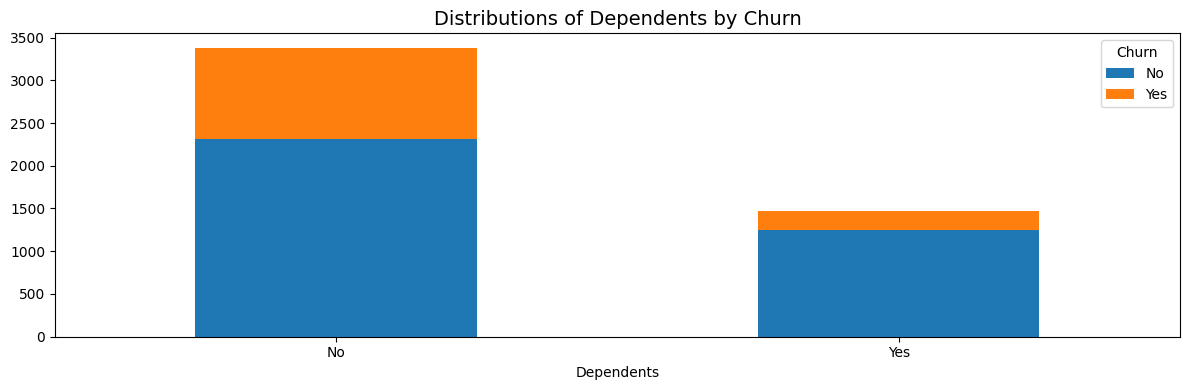

Percentage distribution of Dependents by Churn:


Churn,No,Yes
Dependents,,
No,47.723058,21.924583
Yes,25.736658,4.615702



------------------------------------------------------------------------------------------------------------------------------------------------------



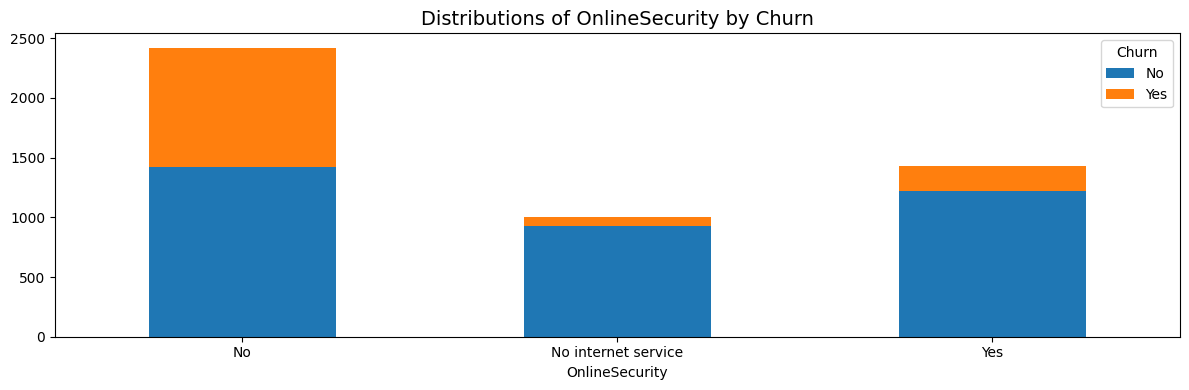

Percentage distribution of OnlineSecurity by Churn:


Churn,No,Yes
OnlineSecurity,,
No,29.239646,20.626417
No internet service,19.122192,1.545436
Yes,25.097878,4.368432



------------------------------------------------------------------------------------------------------------------------------------------------------



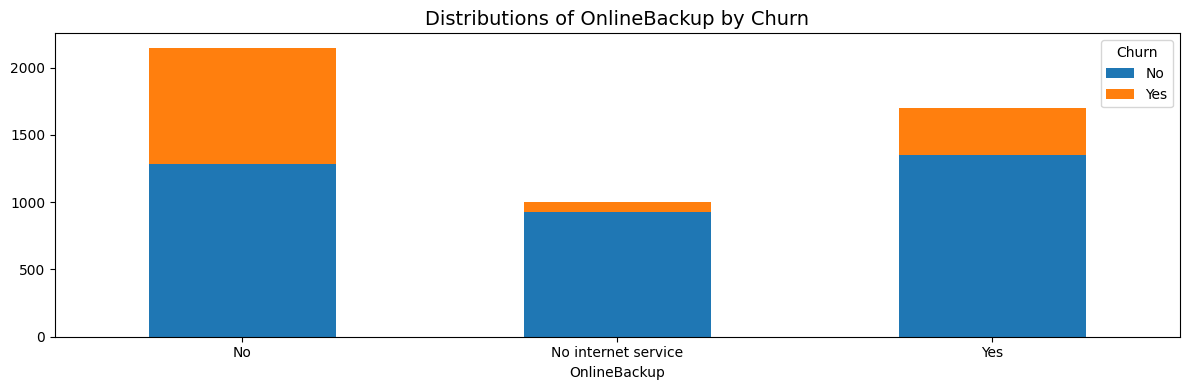

Percentage distribution of OnlineBackup by Churn:


Churn,No,Yes
OnlineBackup,,
No,26.457861,17.803421
No internet service,19.122192,1.545436
Yes,27.879662,7.191428



------------------------------------------------------------------------------------------------------------------------------------------------------



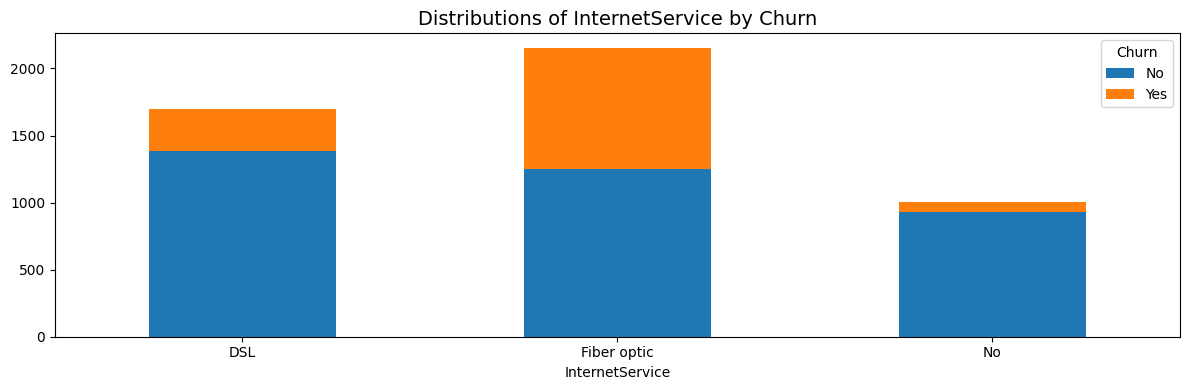

Percentage distribution of InternetService by Churn:


Churn,No,Yes
InternetService,,
DSL,28.539048,6.408407
Fiber optic,25.798475,18.586441
No,19.122192,1.545436



------------------------------------------------------------------------------------------------------------------------------------------------------



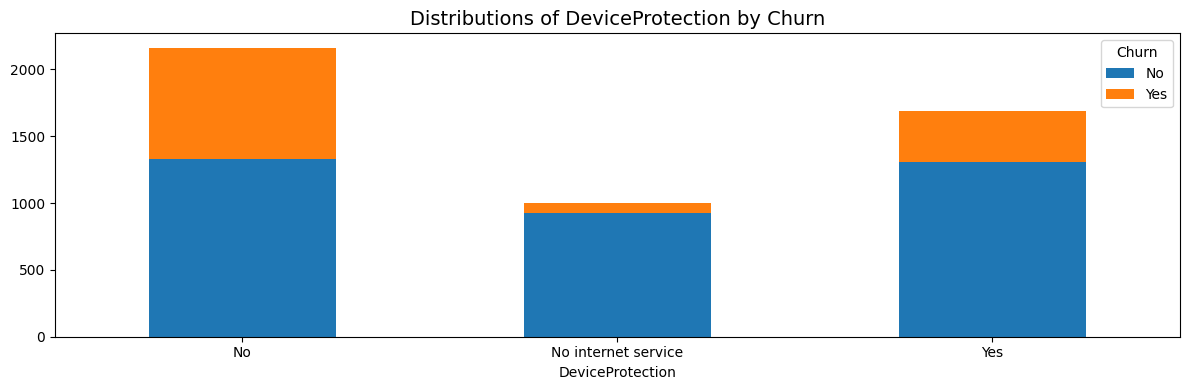

Percentage distribution of DeviceProtection by Churn:


Churn,No,Yes
DeviceProtection,,
No,27.446940,17.102823
No internet service,19.122192,1.545436
Yes,26.890583,7.892026



------------------------------------------------------------------------------------------------------------------------------------------------------



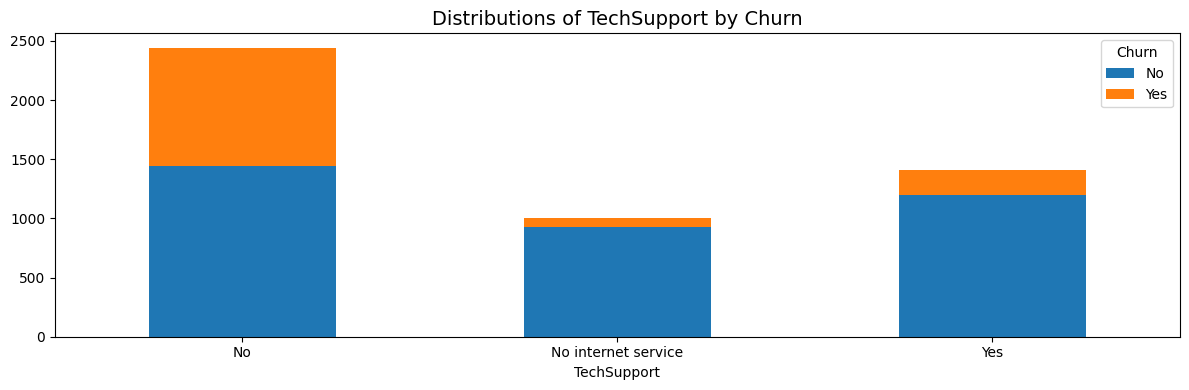

Percentage distribution of TechSupport by Churn:


Churn,No,Yes
TechSupport,,
No,29.734185,20.585205
No internet service,19.122192,1.545436
Yes,24.603338,4.409644



------------------------------------------------------------------------------------------------------------------------------------------------------



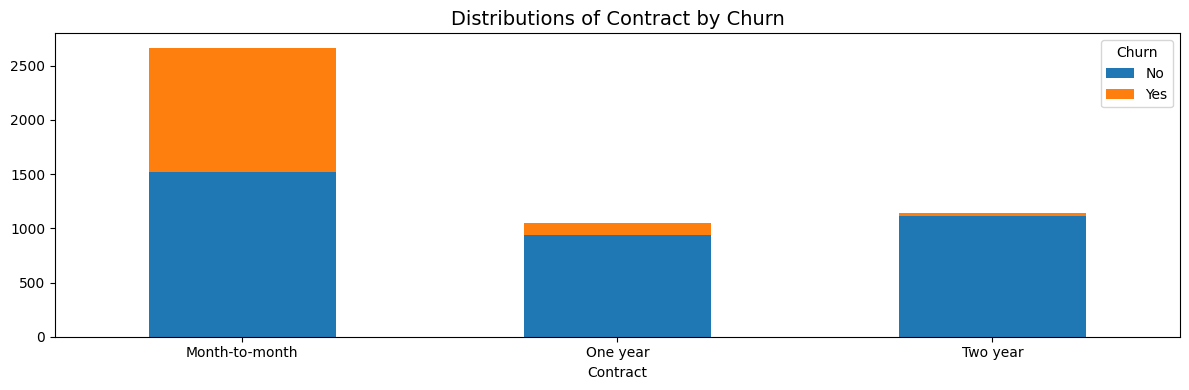

Percentage distribution of Contract by Churn:


Churn,No,Yes
Contract,,
Month-to-month,31.217803,23.696682
One year,19.348856,2.184216
Two year,22.893056,0.659386



------------------------------------------------------------------------------------------------------------------------------------------------------



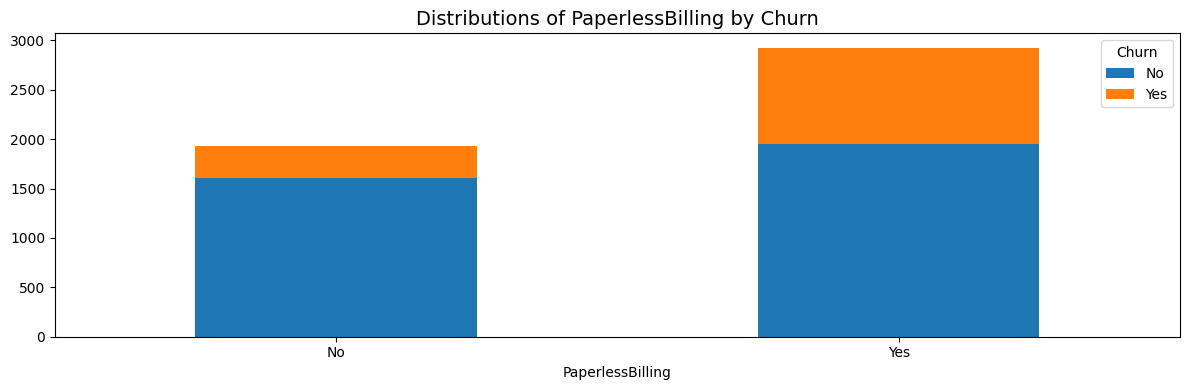

Percentage distribution of PaperlessBilling by Churn:


Churn,No,Yes
PaperlessBilling,,
No,33.195961,6.532042
Yes,40.263754,20.008242



------------------------------------------------------------------------------------------------------------------------------------------------------



In [11]:
for col in df.select_dtypes(include='O'):
    if col == 'Churn':
        continue
    counts = df.groupby([col, 'Churn']).size().unstack(fill_value=0)
    percentage_counts = counts.div(df[col].count(), axis=0) * 100

    counts.plot(
        kind='bar', 
        stacked=True, 
        figsize=(12, 4), 
    )
    
    plt.title(f"Distributions of {col} by Churn", fontsize=14)
    plt.xticks(rotation=0)
    plt.legend(['No','Yes'],title="Churn", fontsize=10)
    plt.tight_layout()
    plt.show()

    print(f"Percentage distribution of {col} by Churn:")
    display(percentage_counts)
    print("\n" + "---"*50 + "\n")

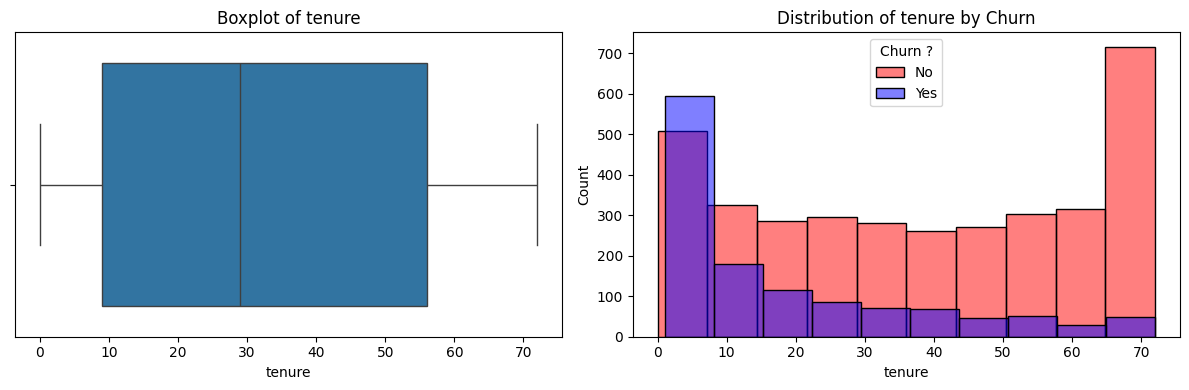

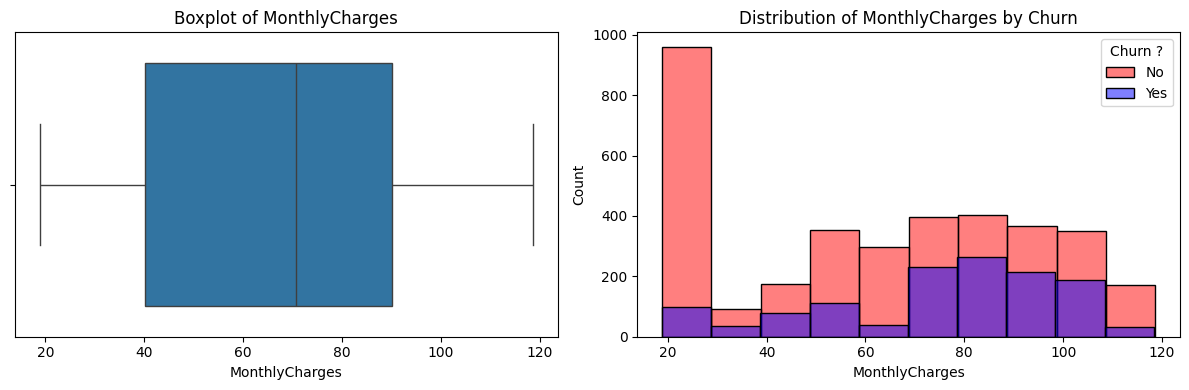

In [12]:
for i in df.select_dtypes('number'):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=i)
    plt.title(f'Boxplot of {i}')

    plt.subplot(1, 2, 2)
    bins = 10
    
    sns.histplot(data=df[df['Churn'] == 'No'], x=i, bins=bins, color='red', kde=False, label='No', alpha=0.5)
    sns.histplot(data=df[df['Churn'] == 'Yes'], x=i, bins=bins, color='blue', kde=False, label='Yes', alpha=0.5)

    plt.title(f'Distribution of {i} by Churn')
    plt.legend(title='Churn ?')

    plt.tight_layout()
    plt.show()

---

## **Machine Learning**

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

**Splitting Features and Target**

In [14]:
X = df.drop(columns='Churn')
y = df['Churn'].map({'Yes': 1, 'No': 0})

In [15]:
from sklearn.model_selection import train_test_split

**Splitting Train and Test Data**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1230,stratify=y)

### **Preprocessing Data**

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import cross_val_score, StratifiedGroupKFold, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline


In [18]:
summary_df = pd.DataFrame(unique_values_summary)

pd.set_option('display.max_colwidth',None)
display(summary_df[~summary_df['Column'].isin(['Churn'])])
pd.reset_option('display.max_colwidth')

,Column,Total Unique Values,Unique Values
0,Dependents,2,"[Yes, No]"
1,tenure,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1, 48, 13, 58, 7, 4, 70, 34, 31, 37, 15, 71, 10, 43, 22, 33, 69, 54, 63, 55, 66, 56, 32, 26, 24, 2, 51, 23, 49, 28, 36, 45, 42, 6, 61, 59, 67, 65, 0, 16, 52, 41, 25, 62, 20, 50, 30, 60, 19, 35, 57, 27, 44, 53, 12, 46, 39, 29, 38, 68, 21]"
2,OnlineSecurity,3,"[No, Yes, No internet service]"
3,OnlineBackup,3,"[No, Yes, No internet service]"
4,InternetService,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,3,"[Yes, No internet service, No]"
6,TechSupport,3,"[Yes, No, No internet service]"
7,Contract,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,2,"[Yes, No]"
9,MonthlyCharges,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7, 44.05, 73.5, 40.3, 33.6, 96.25, 70.45, 30.55, 44.8, 20.0, 81.5, 94.35, 35.3, 50.7, 106.05, 56.3, 20.65, 98.9, 40.2, 81.2, 19.45, 116.1, 55.2, 94.45, 84.85, 19.6, 79.0, 74.7, 30.4, 55.8, 104.5, 70.55, 55.25, 96.65, 88.85, 109.25, 104.75, 74.4, 79.4, 74.1, 73.05, 94.6, 70.35, 79.6, 79.5, 90.7, 81.0, 87.75, 118.65, 24.8, 105.25, 57.8, 19.0, 25.7, 54.2, 44.85, 19.95, 81.05, 20.35, 85.25, 67.45, 100.3, 20.95, 105.2, 26.35, 82.15, 102.6, 106.15, 23.95, 115.8, 66.85, 90.35, 89.85, 73.35, 104.45, 35.45, 88.4, 70.5, 25.1, 39.0, 83.25, 74.3, 54.3, 50.45, 86.0, 19.55, 103.5, 91.7, 64.85, 99.65, 68.75, 106.25, 75.9, 94.4, ...]"


### **Transform the Data**

Before training the model, the data needs to be transformed to ensure proper learning based on the table above:

- **Scaling for Numerical Features:**
  - For `tenure` and `MonthlyCharges`, They are using `StandardScaler` to normalize the data, ensuring all numerical features contribute equally to the model.
  
- **Encoding for Categorical Features:**
  - **One-Hot Encoding:** Applied to categorical features like `Dependents`, `OnlineSecurity`, `InternetService`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, and `PaperlessBilling` to avoid **ordinal relationships** and **allow the model to interpret each category independently**.
  
  - **Ordinal Encoding:** Applied to the `Contract` feature, as it has an inherent order (e.g., `Month-to-month`, `One year`, `Two year`), preserving the sequence of the categories.

In [19]:
scaling_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])),
    ('min_max_scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[        
        ('ordinal', ordinal_transformer, ['Contract']),

        ('num', onehot_transformer, ['Dependents', 'OnlineSecurity', 'InternetService', 
                                     'OnlineBackup','DeviceProtection', 'TechSupport', 
                                     'PaperlessBilling']),

        ('scaling',scaling_transformer,['tenure', 'MonthlyCharges'])
    ],
    remainder='passthrough'
)

### **Model Benchmarking: Classification Algorithms**

This section will evaluate multiple classification algorithms to determine the best model for predicting customer churn. Each model is first trained and validated using cross-validation, with **`recall`** as the primary evaluation metric during training. After training, the models are tested on a separate test dataset, and their performance is measured using metrics such as **F1 score, accuracy, precision, and recall**. The results from these different models are then compared to identify the most effective model for this Telco Customer Churn data.

In [20]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=123)),
    ('Random Forest', RandomForestClassifier(random_state=123)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=123)),
    ('SVM', SVC(kernel='rbf', random_state=123)),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=123)),
    ('LightGBM', LGBMClassifier(verbose=-1, random_state=123)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=123)),
    ('Ridge Classifier', RidgeClassifier(random_state=123)),
    ('Bagging Classifier', BaggingClassifier(random_state=123))
]

results = []
test_results = []

for name, clf in classifiers:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    
    print(f"Performing cross-validation for {name} ...")
    score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
    results.append({
        'Model': name,
        'Train Recall': score.mean(),
        'Train Std Recall': score.std(),
        'Train Min Recall': score.min()
    })

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict on test set
    y_pred = pipeline.predict(X_test)

    # Calculate metrics for test data
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Append test results
    test_results.append({
        'Model': name,
        'Test F1 Score': f1,
        'Test Accuracy': accuracy,
        'Test Precision': precision,
        'Test Recall': recall
    })


Performing cross-validation for Logistic Regression ...
Performing cross-validation for Random Forest ...
Performing cross-validation for Gradient Boosting ...
Performing cross-validation for SVM ...
Performing cross-validation for XGBoost ...
Performing cross-validation for LightGBM ...
Performing cross-validation for K-Nearest Neighbors ...
Performing cross-validation for Decision Tree ...
Performing cross-validation for Ridge Classifier ...
Performing cross-validation for Bagging Classifier ...


In [21]:
results_df = pd.DataFrame(results).sort_values(by='Train Min Recall',ascending=False).reset_index(drop=True)
display(results_df)

,Model,Train Recall,Train Std Recall,Train Min Recall
0,Logistic Regression,0.523301,0.015775,0.500000
1,Gradient Boosting,0.522330,0.029544,0.475728
2,LightGBM,0.535922,0.040218,0.466019
3,XGBoost,0.529126,0.034326,0.461165
4,K-Nearest Neighbors,0.494175,0.024057,0.451456
5,Decision Tree,0.500971,0.038273,0.427184
6,Random Forest,0.485437,0.049219,0.417476
7,Ridge Classifier,0.473786,0.032579,0.412621
8,SVM,0.461165,0.033351,0.398058
9,Bagging Classifier,0.442718,0.036765,0.378641


In [22]:
test_results_df = pd.DataFrame(test_results).sort_values(by='Test Recall',ascending=False).reset_index(drop=True)
display(test_results_df)

,Model,Test F1 Score,Test Accuracy,Test Precision,Test Recall
0,Decision Tree,0.499115,0.708548,0.459283,0.546512
1,Gradient Boosting,0.580508,0.796087,0.640187,0.531008
2,Logistic Regression,0.568421,0.788877,0.622120,0.523256
3,LightGBM,0.552017,0.782698,0.610329,0.503876
4,XGBoost,0.537815,0.773429,0.587156,0.496124
5,K-Nearest Neighbors,0.525667,0.762101,0.558952,0.496124
6,SVM,0.548753,0.795057,0.661202,0.468992
7,Ridge Classifier,0.539326,0.788877,0.641711,0.465116
8,Bagging Classifier,0.504237,0.759011,0.556075,0.461240
9,Random Forest,0.505353,0.762101,0.564593,0.457364


**Interpretation of Model Benchmarking in Classifier Algorithms**

Based on the model benchmarking on both the training and test data, we can see that the top four classification algorithms that are consistently performing well are `Logistic Regression`, `Decision Tree`, `Gradient Boosting`, and `XGBoost`. Therefore, the fourth classifier will be used in the next model selection phase, where several resamplers will be applied.

### **Model Benchmarking with Resampling Techniques**

This process involves evaluating various classification algorithms along several different resampling methods to handle class imbalance and improve model performance. The fourth classifiers from previous process which are **Logistic Regression, Decision Tree, Gradient Boosting, XGBoost, and LightGBM**, are trained and evaluated using cross-validation with recall as the main metric. After fitting the models, their performance is assessed on the test set using **F1 score, accuracy, precision, and recall**. 

**The resampling techniques used are as follows:**

- **None**: No resampling is applied (baseline).
- **RandomOverSampler**: This technique randomly oversamples the minority class to balance the class distribution.
- **RandomUnderSampler**: This method randomly undersamples the majority class to balance the class distribution.
- **SMOTE (Synthetic Minority Over-sampling Technique)**: SMOTE creates synthetic samples for the minority class by interpolating between existing minority class instances.
- **NearMiss**: A technique that under-samples the majority class by selecting examples that are closest to the minority class instances.
- **SMOTEENN**: This combines SMOTE with Edited Nearest Neighbors (ENN) to first oversample the minority class and then clean up the resulting dataset by removing noisy instances.

>The results are stored for comparison to identify the best combination of model and resampling technique that can be use to identify correctly of Telco Customer Churn.


In [23]:
scaling_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

ordinal_transformer = Pipeline([
    ('ordinal', OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])),
    ('min_max_scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[        
        ('ordinal', ordinal_transformer, ['Contract']),

        ('num', onehot_transformer, ['Dependents', 'OnlineSecurity', 'InternetService', 
                                     'OnlineBackup','DeviceProtection', 'TechSupport', 
                                     'PaperlessBilling',]),

        ('scaling',scaling_transformer,['tenure', 'MonthlyCharges'])
    ],
    remainder='passthrough'
)

# Define classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=17)),
    ('Decision Tree', DecisionTreeClassifier(random_state=17)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=17)),
    ('XGBoost', XGBClassifier(eval_metric='logloss', random_state=17)),
    ('LightGBM', LGBMClassifier(verbose=-1, random_state=123)),
]

# Define resampling methods
resamplers = [
    ('None', None),
    ('RandomOverSampler', RandomOverSampler(random_state=17)),
    ('RandomUnderSampler', RandomUnderSampler(random_state=17)),
    ('SMOTE', SMOTE(random_state=17)),
    ('NearMiss', NearMiss()),
    ('SMOTEENN', SMOTEENN(random_state=17))
]

# Results storage
results = []
test_results = []

# Iterate through resampling methods and classifiers
for resample_name, resample in resamplers:
    for clf_name, clf in classifiers:
        print(f"Processing {clf_name} with {resample_name} ...")
        
        # Build the pipeline
        steps = [('preprocessor', preprocessor)]
        if resample:
            steps.append(('resampler', resample))
        steps.append(('classifier', clf))
        
        pipeline = Pipeline(steps=steps)
        
        # Cross-validation
        try:
            cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='recall')
            results.append({
                'Model': clf_name,
                'Resampler': resample_name,
                'Train Recall Mean': cv_scores.mean(),
                'Train Recall Std': cv_scores.std(),
                'Train Recall Min': cv_scores.min()
            })
        
            # Fit on full training data
            pipeline.fit(X_train, y_train)
        
            # Predict on test data
            y_pred = pipeline.predict(X_test)
        
            # Evaluate metrics on the test set
            f1 = f1_score(y_test, y_pred)
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
        
            test_results.append({
                'Model': clf_name,
                'Resampler': resample_name,
                'Test F1 Score': f1,
                'Test Accuracy': accuracy,
                'Test Precision': precision,
                'Test Recall': recall
            })
        
        except Exception as e:
            print(f"Error processing {clf_name} with {resample_name}: {e}")


Processing Logistic Regression with None ...
Processing Decision Tree with None ...
Processing Gradient Boosting with None ...
Processing XGBoost with None ...
Processing LightGBM with None ...
Processing Logistic Regression with RandomOverSampler ...
Processing Decision Tree with RandomOverSampler ...
Processing Gradient Boosting with RandomOverSampler ...
Processing XGBoost with RandomOverSampler ...
Processing LightGBM with RandomOverSampler ...
Processing Logistic Regression with RandomUnderSampler ...
Processing Decision Tree with RandomUnderSampler ...
Processing Gradient Boosting with RandomUnderSampler ...
Processing XGBoost with RandomUnderSampler ...
Processing LightGBM with RandomUnderSampler ...
Processing Logistic Regression with SMOTE ...
Processing Decision Tree with SMOTE ...
Processing Gradient Boosting with SMOTE ...
Processing XGBoost with SMOTE ...
Processing LightGBM with SMOTE ...
Processing Logistic Regression with NearMiss ...
Processing Decision Tree with NearM

In [24]:
pd.DataFrame(results).sort_values('Train Recall Min', ascending=False)

,Model,Resampler,Train Recall Mean,Train Recall Std,Train Recall Min
10,Logistic Regression,RandomUnderSampler,0.800971,0.013730,0.776699
5,Logistic Regression,RandomOverSampler,0.797087,0.012807,0.776699
25,Logistic Regression,SMOTEENN,0.808738,0.020958,0.771845
27,Gradient Boosting,SMOTEENN,0.798058,0.031699,0.757282
12,Gradient Boosting,RandomUnderSampler,0.782524,0.020226,0.757282
7,Gradient Boosting,RandomOverSampler,0.781553,0.020132,0.752427
15,Logistic Regression,SMOTE,0.788350,0.024291,0.742718
14,LightGBM,RandomUnderSampler,0.772816,0.029352,0.718447
29,LightGBM,SMOTEENN,0.750485,0.022686,0.718447
28,XGBoost,SMOTEENN,0.747573,0.026232,0.708738


In [25]:
pd.DataFrame(test_results).sort_values(by='Test Recall',ascending=False)

,Model,Resampler,Test F1 Score,Test Accuracy,Test Precision,Test Recall
25,Logistic Regression,SMOTEENN,0.630339,0.741504,0.508314,0.829457
10,Logistic Regression,RandomUnderSampler,0.628148,0.741504,0.508393,0.821705
12,Gradient Boosting,RandomUnderSampler,0.620791,0.733265,0.498824,0.821705
5,Logistic Regression,RandomOverSampler,0.628743,0.744593,0.512195,0.813953
15,Logistic Regression,SMOTE,0.627273,0.746653,0.514925,0.802326
27,Gradient Boosting,SMOTEENN,0.611621,0.738414,0.505051,0.775194
7,Gradient Boosting,RandomOverSampler,0.614198,0.742533,0.510256,0.771318
14,LightGBM,RandomUnderSampler,0.585799,0.711637,0.473684,0.767442
13,XGBoost,RandomUnderSampler,0.575581,0.699279,0.460465,0.767442
29,LightGBM,SMOTEENN,0.617834,0.752832,0.524324,0.751938


**Interpretation of Results**

Looking at the results, it’s clear that the most consistent model is `Logistic Regression` combined with the `SMOTEENN` resampler technique. This combination of algorithms yielded a test recall of **0.829457** and a mean train recall  of **0.808738**, showing good performance across both the training and test data. 

The relatively close values between test and train recall suggest that the model is generalizing well. The high recall on the test set indicates that the model is quite effective at identifying positive cases, making it a reliable choice for this problem.


----

## **Tuning Hyperparameters**

**Before Tuning Hyperparameters**

In [26]:
steps = [
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=123)),
    ('classifier', LogisticRegression(random_state=123))
]

model_before_tuning = Pipeline(steps=steps)

model_before_tuning.fit(X_train,y_train)

y_test_pred_bt = model_before_tuning.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred_bt)
tn, fp, fn, tp = cm.ravel()

# Calculate metrics for the test set
test_metrics_bt = {
    "F1 Score": f1_score(y_test, y_test_pred_bt),
    "Accuracy": accuracy_score(y_test, y_test_pred_bt),
    "Precision": precision_score(y_test, y_test_pred_bt),
    "Recall": recall_score(y_test, y_test_pred_bt),
    "True Negative": tn,
    "False Positive": fp,
    "False Negative": fn,
    "True Positive": tp
}

logistic_regression_params = model_before_tuning.named_steps['classifier'].get_params()
print(f"Logistic Regression Parameters = { {key: logistic_regression_params[key] for key in ['C', 'max_iter', 'penalty', 'solver']} }")

before_tuning_results = pd.DataFrame([test_metrics_bt])
display(before_tuning_results)

Logistic Regression Parameters = {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


,F1 Score,Accuracy,Precision,Recall,True Negative,False Positive,False Negative,True Positive
0,0.619116,0.725026,0.489842,0.841085,487,226,41,217


**Tuning Hyperparameters**

In this process, I perform hyperparameter tuning for the `Logistic Regression` model using a grid search approach. The `param_grid` hyperparameter in `GridSearchCV` is used for tuning several key hyperparameters to optimize model performance:

- **`classifier__solver`**: Specifies the algorithm used to optimize the logistic regression. Solver Options:
  - `lbfgs`
  - `liblinear`
  - `saga`

- **`classifier__penalty`**: Defines the regularization technique to be used. Penalty Options:
  - `l2`
  - `l1`
  - `elasticnet`

- **`classifier__C`**: Controls the strength of regularization. A smaller value results in stronger regularization, and a larger value reduces regularization.

- **`classifier__max_iter`**: Sets the maximum number of iterations for the optimization process.

- **`classifier__l1_ratio`**: (Only for the `'elasticnet'` penalty) Specifies the mix between L1 and L2 regularization


**First Tuning Hyperparameters**

In this first round of hyperparameter tuning, I test different values of the regularization parameter `C` and the maximum number of iterations `max_iter` for four combinations of solver and penalty. These are the following hyperparameters were tested:

- **Solvers**: 
  - `'lbfgs'`, `'liblinear'`, and `'saga'`
- **Penalties**: 
  - `'l2'`, `'l1'`, and `'elasticnet'` (for `'saga'` only)
- **Regularization Strength (C)**: 
  - `[0.5, 1, 10, 100]`
- **Maximum Iterations (max_iter)**: 
  - `[50, 100, 150]`

In [27]:
# Define the pipeline
steps = [
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=123)),
    ('classifier', LogisticRegression(random_state=123))
]
pipeline = Pipeline(steps=steps)

# Define parameter grid with valid combinations only
param_grid_1 = [
    {'classifier__solver': ['lbfgs'], 'classifier__penalty': ['l2'], 
     'classifier__C': [0.5, 1, 10, 100], 'classifier__max_iter': [50, 100, 150]},
    
    #Important
    {'classifier__solver': ['liblinear'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': [0.5, 1, 10, 100], 'classifier__max_iter': [50, 100, 150]},
    
    
    {'classifier__solver': ['saga'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': [0.5, 1, 10, 100], 'classifier__max_iter': [50, 100, 150]},

     {'classifier__solver': ['saga'], 'classifier__penalty': ['elasticnet'], 
     'classifier__C': [0.5, 1, 10, 100], 'classifier__max_iter': [50, 100, 150],
     'classifier__l1_ratio':[0.5,0.75]}
]

# Set up GridSearchCV
grid_search_1 = GridSearchCV(
    pipeline,
    param_grid=param_grid_1,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_1.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best parameters:", grid_search_1.best_params_)
print("Best cross-validated recall score:", grid_search_1.best_score_)

# Evaluate on the test set
best_model_1 = grid_search_1.best_estimator_

# Predict on the test and training sets
y_test_pred_1 = best_model_1.predict(X_test)

cm_1 = confusion_matrix(y_test, y_test_pred_1)
tn_1, fp_1, fn_1, tp_1 = cm_1.ravel()

# Calculate metrics for the test set
test_metrics_at_1 = {
    "F1 Score": f1_score(y_test, y_test_pred_1),
    "Accuracy": accuracy_score(y_test, y_test_pred_1),
    "Precision": precision_score(y_test, y_test_pred_1),
    "Recall": recall_score(y_test, y_test_pred_1),
    "True Negative": tn_1,
    "False Positive": fp_1,
    "False Negative": fn_1,
    "True Positive": tp_1
}


# Create a DataFrame for the results
after_tuning_results_1 = pd.DataFrame([test_metrics_at_1])

# Display the DataFrame
after_tuning_results_1

Best parameters: {'classifier__C': 0.5, 'classifier__max_iter': 50, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validated recall score: 0.8242718446601941


,F1 Score,Accuracy,Precision,Recall,True Negative,False Positive,False Negative,True Positive
0,0.62,0.726056,0.49095,0.841085,488,225,41,217


**Second Tuning Hyperparameters**

In the **`second tuning`**, the hyperparameter grid is adjusted by narrowing down the values of `C` and `max_iter`. Specifically:

- **Regularization Strength (C)**: I shift the range of values for C to **[0.01, 0.1]**, focusing on smaller regularization strengths.
- **Maximum Iterations (max_iter)**: I expand the possible values for max_iter to **[150, 200, 250]**, giving the model more iterations to converge.

In [28]:
# Define the pipeline
steps = [
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=123)),
    ('classifier', LogisticRegression(random_state=123))
]
pipeline = Pipeline(steps=steps)

# Define parameter grid with valid combinations only
param_grid_2 = [
    {'classifier__solver': ['lbfgs'], 'classifier__penalty': ['l2'], 
     'classifier__C': np.arange(0.01,0.1), 'classifier__max_iter': [150, 200, 250]},
    
    #Important
    {'classifier__solver': ['liblinear'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': np.arange(0.01,0.1), 'classifier__max_iter': [150, 200, 250]},
    
    
    {'classifier__solver': ['saga'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': np.arange(0.01,0.1), 'classifier__max_iter': [150, 200, 250]},

     {'classifier__solver': ['saga'], 'classifier__penalty': ['elasticnet'], 
     'classifier__C': np.arange(0.01,0.1), 'classifier__max_iter': [150, 200, 250],
     'classifier__l1_ratio':[0.5,0.75]}
]

# Set up GridSearchCV
grid_search_2 = GridSearchCV(
    pipeline,
    param_grid=param_grid_2,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_2.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best parameters:", grid_search_2.best_params_)
print("Best cross-validated recall score:", grid_search_2.best_score_)

# Evaluate on the test set
best_model_2 = grid_search_2.best_estimator_

# Predict on the test and training sets
y_test_pred_2 = best_model_2.predict(X_test)

cm_2 = confusion_matrix(y_test, y_test_pred_2)
tn_2, fp_2, fn_2, tp_2 = cm_2.ravel()

# Calculate metrics for the test set
test_metrics_at_2 = {
    "F1 Score": f1_score(y_test, y_test_pred_2),
    "Accuracy": accuracy_score(y_test, y_test_pred_2),
    "Precision": precision_score(y_test, y_test_pred_2),
    "Recall": recall_score(y_test, y_test_pred_2),
    "True Negative": tn_2,
    "False Positive": fp_2,
    "False Negative": fn_2,
    "True Positive": tp_2
}

# Create a DataFrame for the results
after_tuning_results_2 = pd.DataFrame([test_metrics_at_2])

# Display the DataFrame
after_tuning_results_2

Best parameters: {'classifier__C': 0.01, 'classifier__max_iter': 150, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validated recall score: 0.8970873786407767


,F1 Score,Accuracy,Precision,Recall,True Negative,False Positive,False Negative,True Positive
0,0.59204,0.662204,0.435897,0.922481,405,308,20,238


**Third Tuning Hyperparameters**

In this third hyperparameter tuning, I refine the search space for the regularization strength (`C`) and the maximum number of iterations (`max_iter`) to achieve more precise model behavior.
- **Regularization Strength (C)**: 
  I narrow the range of `C` values to `[0.03, 0.08, 0.3, 0.8]`. These values are chosen to allow for fine-tuned control over the model's regularization, balancing underfitting and overfitting with a more granular set of options.

- **Maximum Iterations (max_iter)**: 
  I expand the possible `max_iter` values to cover a range from 25 to 200, stepping by 25 (`list(range(25, 200, 25))`). This provides the model with a broader scope of iteration limits, enabling it to converge more smoothly over varying durations, thus improving optimization without prematurely stopping the training process.

In [29]:
# Define the pipeline
steps = [
    ('preprocessor', preprocessor),
    ('resampler', SMOTEENN(random_state=123)),
    ('classifier', LogisticRegression(random_state=123))
]
pipeline = Pipeline(steps=steps)

# Define parameter grid with valid combinations only
param_grid_3 = [
    {'classifier__solver': ['lbfgs'], 'classifier__penalty': ['l2'], 
     'classifier__C': [0.03, 0.08, 0.3, 0.8], 'classifier__max_iter': list(range(25, 200, 25))},
    
    # Important
    {'classifier__solver': ['liblinear'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': [0.03, 0.08, 0.3, 0.8], 'classifier__max_iter': list(range(25, 200, 25))},
    
    {'classifier__solver': ['saga'], 'classifier__penalty': ['l1', 'l2'], 
     'classifier__C': [0.03, 0.08, 0.3, 0.8], 'classifier__max_iter': list(range(25, 200, 25))},

    {'classifier__solver': ['saga'], 'classifier__penalty': ['elasticnet'], 
     'classifier__C': [0.03, 0.08, 0.3, 0.8], 'classifier__max_iter': list(range(25, 200, 25)),
     'classifier__l1_ratio': [0.25, 0.5, 0.75]}
]

# Set up GridSearchCV
grid_search_3 = GridSearchCV(
    pipeline,
    param_grid=param_grid_3,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search_3.fit(X_train, y_train)

# Best hyperparameters and performance
print("Best parameters:", grid_search_3.best_params_)
print("Best cross-validated recall score:", grid_search_3.best_score_)

# Evaluate on the test set
best_model_3 = grid_search_3.best_estimator_

# Predict on the test and training sets
y_test_pred_3 = best_model_3.predict(X_test)

cm_3 = confusion_matrix(y_test, y_test_pred_3)
tn_3, fp_3, fn_3, tp_3 = cm_3.ravel()

# Calculate metrics for the test set
test_metrics_at_3 = {
    "F1 Score": f1_score(y_test, y_test_pred_3),
    "Accuracy": accuracy_score(y_test, y_test_pred_3),
    "Precision": precision_score(y_test, y_test_pred_3),
    "Recall": recall_score(y_test, y_test_pred_3),
    "True Negative": tn_3,
    "False Positive": fp_3,
    "False Negative": fn_3,
    "True Positive": tp_3
}

# Create a DataFrame for the results
after_tuning_results_3 = pd.DataFrame([test_metrics_at_3])

# Display the DataFrame
after_tuning_results_3

Best parameters: {'classifier__C': 0.03, 'classifier__max_iter': 25, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best cross-validated recall score: 0.8563106796116504


,F1 Score,Accuracy,Precision,Recall,True Negative,False Positive,False Negative,True Positive
0,0.61642,0.706488,0.472165,0.887597,457,256,29,229


In [30]:
params_df = pd.DataFrame([grid_search_1.best_params_,grid_search_2.best_params_,grid_search_3.best_params_],index=['After First Tuning', 'After Second Tuning','After Third Tuning'])
params_df

,classifier__C,classifier__max_iter,classifier__penalty,classifier__solver
After First Tuning,0.50,50,l2,lbfgs
After Second Tuning,0.01,150,l1,liblinear
After Third Tuning,0.03,25,l1,liblinear


In [31]:
tuning_df = pd.DataFrame([test_metrics_bt,test_metrics_at_1,test_metrics_at_2,test_metrics_at_3],index=['Before Tuning','After First Tuning', 'After Second Tuning','After Third Tuning'])
tuning_df

,F1 Score,Accuracy,Precision,Recall,True Negative,False Positive,False Negative,True Positive
Before Tuning,0.619116,0.725026,0.489842,0.841085,487,226,41,217
After First Tuning,0.620000,0.726056,0.490950,0.841085,488,225,41,217
After Second Tuning,0.592040,0.662204,0.435897,0.922481,405,308,20,238
After Third Tuning,0.616420,0.706488,0.472165,0.887597,457,256,29,229


---

## **Best Model Performance**

### **Cost Calculation for Telco Customer Churn**
To **select the most suitable machine learning model for predicting telco customer churn**, I calculate the total **cost of churn management** using these following variables:

- **CRC** (Customer Retention Cost) = $1
- **CAC** (Customer Acquisition Cost) = $5

The **CAC** is typically higher than the **CRC**, as acquiring new customers is generally more expensive than retaining existing ones. According to [Optimove](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs), acquiring new customers often costs **`five times`** more than retaining current ones. This is reflected in the values we’ve chosen for **CAC** and **CRC**.

**Formula with Machine Learning:** 
$$
\text{Total Cost} =  ( \text{(TP+FP)} \times \text{CRC}) + (\text{CAC} \times \text{FN})
$$


**Formula without Machine Learning:**
$$
\text{Total Cost of Churn} = \text{(TN+FP+TP+FN)} \times \text{CRC}
$$

In [32]:
CRC = 1
CAC = 5

# Create cost_df as a copy of specific columns
cost_df = tuning_df[["True Negative", "False Positive", "False Negative", "True Positive"]].copy()

# Add a 'Total Cost' column for each row based on the formula
cost_df['Total Cost'] = ((cost_df["True Positive"] + cost_df["False Positive"]) * CRC) + (cost_df["False Negative"] * CAC)

# Extract values for "Before Tuning" row
before_tuning_row = cost_df.loc["Before Tuning"]
TN = before_tuning_row["True Negative"]
FP = before_tuning_row["False Positive"]
FN = before_tuning_row["False Negative"]
TP = before_tuning_row["True Positive"]

# Calculate Total Cost for "Without ML" using the extracted values with Assumptions All customer has Churned
total_cost_without_ml = (TN + FP + TP + FN) * CRC

# Add a new row labeled "Without ML" to the dataframe
cost_df.loc["Without Machine Learning"] = [TN, FP, FN, TP, total_cost_without_ml]

cost_df

,True Negative,False Positive,False Negative,True Positive,Total Cost
Before Tuning,487,226,41,217,648
After First Tuning,488,225,41,217,647
After Second Tuning,405,308,20,238,646
After Third Tuning,457,256,29,229,630
Without Machine Learning,487,226,41,217,971


**Choose the Best Model**

From the table, we can observe that the total churn management costs across different machine learning models. The **After Third Tuning** model has the lowest total cost of **630**, which is significantly lower than the **Without Machine Learning** scenario, where the total cost is **971**. 

Therefore, the third tuning model is selected as the best model due to its lowest churn cost.

In [33]:
print(f'Cost Efficiency after using Machine Learning is {1- (630/971):.2f}, resulting in a savings of ${971-630}')

Cost Efficiency after using Machine Learning is 0.35, resulting in a savings of $341


In [34]:
best_model = best_model_3

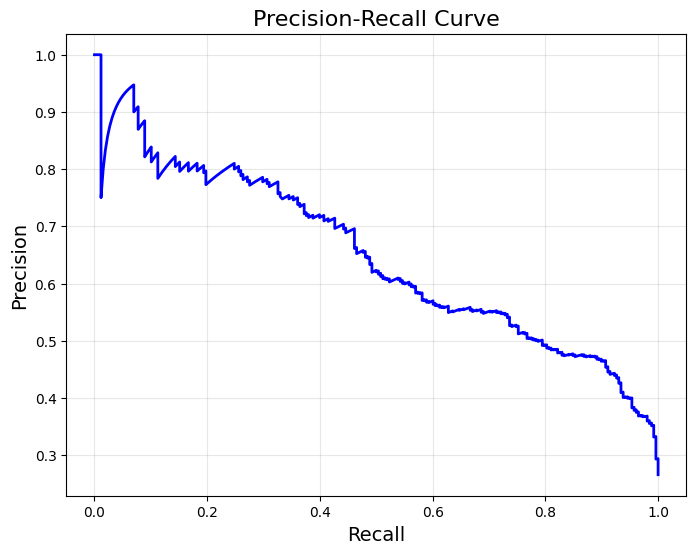

In [35]:
# Get predicted probabilities for the positive class
y_test_proba = best_model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get probabilities for class 1

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', linewidth=2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.grid(alpha=0.3)
plt.show()


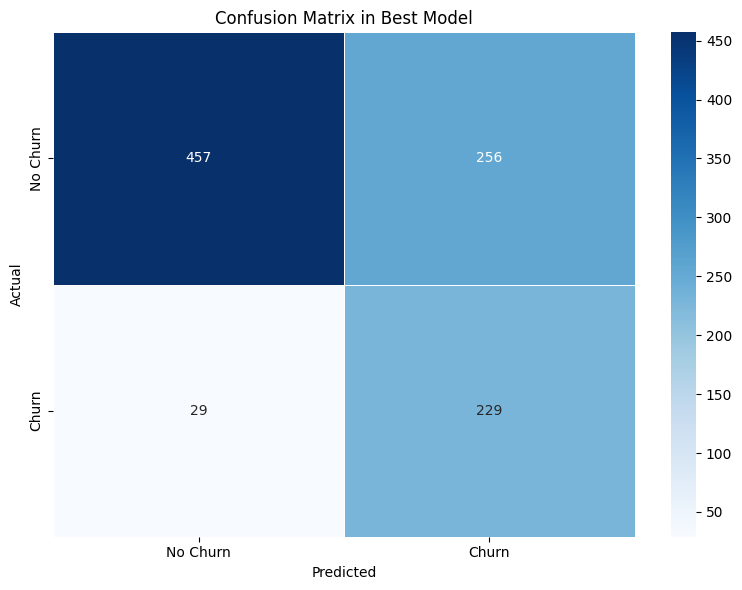

In [36]:
y_pred_bm = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_bm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5,
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix in Best Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_10632\4102599155.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


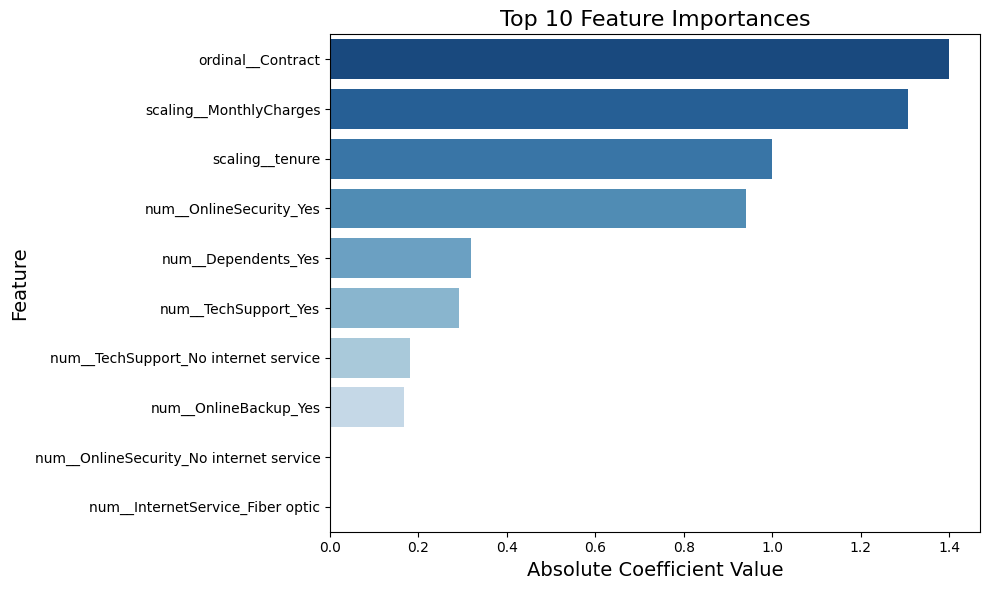

In [37]:
# Retrieve the best classifier from the pipeline
best_classifier = best_model.named_steps['classifier']

# Get the coefficients
coefficients = best_classifier.coef_[0]  # For binary classification, it's a 1D array

# Get feature names from the preprocessor
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# Combine feature names with their corresponding coefficients
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Add the absolute value of the coefficients for ranking
feature_importance["Importance"] = feature_importance["Coefficient"].abs()

# Sort by importance
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10),
    x="Importance", y="Feature",
    palette="Blues_r"
)
plt.title("Top 10 Feature Importances", fontsize=16)
plt.xlabel("Absolute Coefficient Value", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()


### **Feature Importance of the Classifier**

The chart above shows the top 10 features that contribute the most to the predictions made by the classifier in our model.

**Top Features:**
   - **`ordinal__Contract`**: This feature has the highest importance, indicating that the type of contract (likely a categorical variable) has a significant impact on the model's predictions.
   - **`scaling__MonthlyCharges`**: Monthly charges are another critical factor affecting the churn prediction, as customers with higher charges might be more likely to churn.
   - **`scaling__tenure`**: Tenure (length of time with the company) also plays an important role, likely because customers with longer tenure may have different churn behaviors.
   - **`num__OnlineSecurity_Yes`**: Whether a customer has online security is a notable factor in churn prediction, reflecting the value-added services offered to customers.
   

---

# **Conculsion**

In this study, we have addressed the significant challenge of minimizing False Negatives in predicting customer churn for a telecommunications company. The key objective was to accurately identify customers who are at risk of churning to enable timely interventions and retention strategies.

Through extensive experimentation with various classification algorithms, resampling techniques, and hyperparameter tuning, the model performance was optimized. The **Logistic Regression** algorithm combined with the **SMOTENN resampling technique** emerged as the best-performing model. This combination successfully reduced False Negatives, thus improving churn prediction accuracy.

Upon deploying the optimized machine learning model, a remarkable cost efficiency improvement of **35%** was observed compared to the approach without machine learning. This efficiency translates into a significant potential savings of **$341** in customer retention efforts, demonstrating the substantial impact of predictive analytics on operational costs.


## **Recommendations**

1. **Model Deployment and Scaling**: Given the success of the Logistic Regression with SMOTENN, we recommend deploying this model into production for real-time churn prediction to proactively identify at-risk customers and implement targeted retention strategies.

2. **Ongoing Model Monitoring**: As the customer base and behavior evolve, it is crucial to monitor and periodically retrain the model with updated data. 

3. **Further Fine-Tuning**: While the current model is effective, further hyperparameter tuning and testing with other algorithms (e.g., Random Forest, XGBoost) could further optimize performance and accuracy.

4. **Additional Feature Engineering**: Exploring more customer-related features such as usage patterns, service interactions, and support tickets might provide even greater insights into churn behavior, improving predictive capabilities.

5. **Cost-Benefit Analysis**: While the model shows potential cost savings, further analysis should be conducted to measure the long-term financial impact of customer retention efforts.

>*By adopting machine learning and continuously improving the model, the telecommunications company can reduce churn rates, retain valuable customers, and optimize resource allocation, ultimately leading to increased profitability and customer satisfaction.*

---

# **Extract Best Model**

In [38]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump(best_model,file)